# 1.Task Goal and Description
This is a simple machine learning task. The two data sets that are provided are train and test (all in CSV format). The goal is to use the train data set to train a machine learning classifier that can predict if a titanic passenger has survived or not. Then the test data set will be used to test the accuracy of the trained machine learning classifier.

The notebook will go through three main processes:
1. Load the data sets and give a brief description of the datasets.
2. Feature engineering and data cleaning.
3. Train the machine learning model and test it.

According to Forbes 60% of the time is spent by data scientists on cleaning and organizing the data (Press, 2016). <b>SO</b> the large portion of this notebook will be in the second process.

![time](images/dataScientistsTime.jpg)

<i>figure1 (Press, 2016)</i>

# 2. Import Requirements

In [1]:
import pandas as pd
import numpy as np
#visualizing libraries
import matplotlib as plt
import seaborn as sns

# 3. Data
## 3.1 Load Data

In [2]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

## 3.2 Explain The Datasets
The train dataset is the same as the test dataset. But the difference is the test data set don't have the survived feature.

In [3]:
#the head method will print only five rows
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#the head method will print only five rows
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<b>Features titles explanation</b>
* Survived: 0=Survived, 1=Died
* Pclass (Ticket class): 1=1st, 2=2nd, 3=3rd
* SibSp: # of siblings / spouses aboard the Titanic
* parch: # of parents / children aboard the Titanic
* Cabin: Cabin number
* Embarked: port of embarkation
* Ticket: ticket number
* Fare: passenger fare
<hr>

In [5]:
print("(# of rows, # of columns)")
print(f"train dataset {train.shape}")
print(f"test  dataset {test.shape}")

(# of rows, # of columns)
train dataset (891, 12)
test  dataset (418, 11)


as we can see the train dataset has 891 rows and the test dataset has 418 rows. <b>BUT</b> we need to check and see if all the cells in the CSV files are valid data or there are null values.

we can check for null values using <i>isnull</i> or check for valid values using <i>notnull</i>. To see the total null values use the sum method.

also we can use the <i>info</i> method to see the dataset information and compare the number of columns to check if there is any null values. 

In [6]:
print(f"null values in train\n{train.isnull().sum()}")
print(f"null values in test\n{test.isnull().sum()}")

null values in train
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
null values in test
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


* <b>train information</b>

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


* <b>test information</b>

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


<hr>
as we can see there are null values in the train and the test datasets. These null values will be fixed in the next step <b>feature engineering</b>.

## 3.3 Visualize the Train Dataset
Simple visualization of the train dataset to assure more understanding of the proplem. To make the drawing process more simple a method will be written that accept a feature (column name) as a parameter.

In [9]:
def barDiagram(feature):
    sns.catplot(x=feature, col="Survived", data=train, kind="count", height=4, aspect=.7)

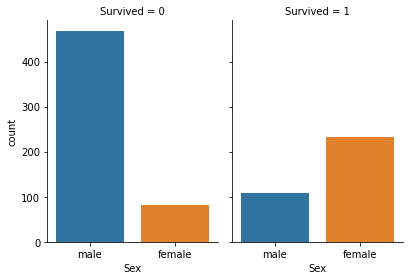

In [10]:
barDiagram("Sex")

* As the diagram shows <b>females</b> most likely survived

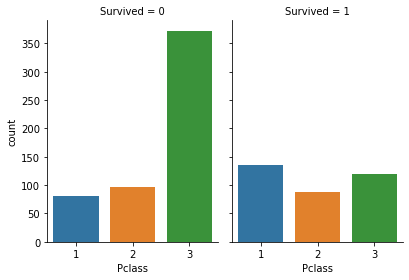

In [11]:
barDiagram("Pclass") 

* As the diagram shows person in the <b>1st class</b> most likely survived

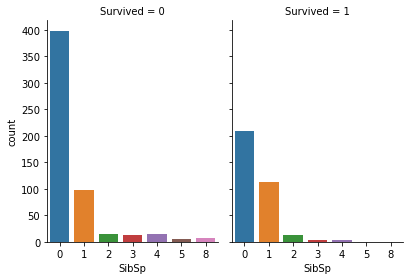

In [12]:
barDiagram("SibSp")

* As the diagram shows <b>person with more than 2 siblings or spouses</b> most likely survived 

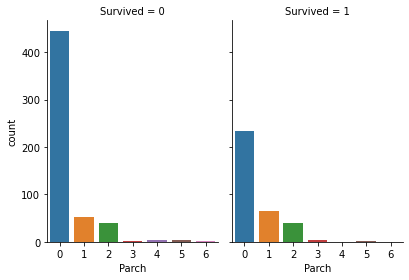

In [13]:
barDiagram("Parch")

* As the diagram shows <b>person with more than 3 children or parents</b> most likely survived 

<hr>

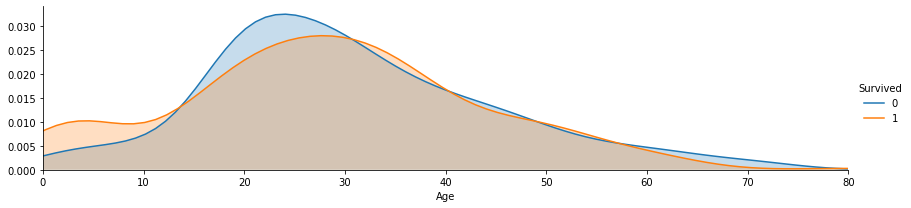

In [14]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, "Age", shade=True)
facet.set(xlim=(0, train["Age"].max()))
facet.add_legend()

* The diagram illustruate the different ages of the survived and dead peopel

# 4. Feature Engineering and Data Cleaning
<b>Feature Engineering</b> is the process of transferring raw data to a form that can be more understandable by the machine learning algorithm. In this process, new features may be added or removed. for example, in the train dataset, the <b>Name</b> feature can provide valuable information if the female passengers are married or not (Miss for unmarried and Mrs for married). 

<b>Data Cleaning</b> is the process of finding unwanted values like nulls, duplicates, or for example what is the passenger hometown. Data cleaning deals with unwanted values either by correcting or removing the data.

<b>Before we start,</b> we need to combine the two datasets so all the change can be done at one step for both datasets train and test.

In [15]:
trainAndTest = [train, test]

## 4.1 Name
We can extract from the name the person title to help us know more about the passengers. The extracted data will be added in new feature called Title

In [16]:
for dataset in trainAndTest:
    #Regular Expression is used to extract person title 
    dataset["Title"] = dataset["Name"].str.extract("([A-Za-z]+)\.", expand=False)

In [17]:
train["Title"].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Jonkheer      1
Don           1
Countess      1
Capt          1
Lady          1
Mme           1
Ms            1
Sir           1
Name: Title, dtype: int64

In [18]:
test["Title"].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

* <b>Title Mapping</b>
Divide the titles into four groups:
1. Mr=>0
2. Miss=>1
3. Mrs=>2
4. Others=>3

In [19]:
titleMapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
for dataset in trainAndTest:
    dataset["Title"] = dataset["Title"].map(titleMapping)
    
#Delete unnecessare feature from the datasets
train.drop("Name", axis=1, inplace=True)
test.drop("Name", axis=1, inplace=True)

In [20]:
train["Title"].value_counts()

0    517
1    182
2    125
3     67
Name: Title, dtype: int64

In [21]:
test["Title"].value_counts()

0    240
1     78
2     72
3     28
Name: Title, dtype: int64

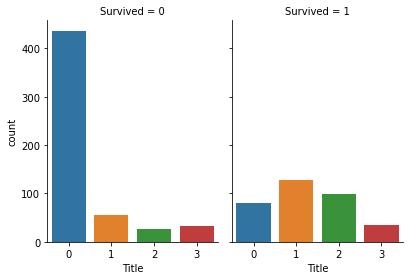

In [22]:
barDiagram("Title")

## 4.2 Sex
Map the sex values to numbers.
<b>Sex Mapping</b>
1. male=>0
2. Female=>1

In [23]:
sexMapping = {"male": 0, "female":1}
for dataset in trainAndTest:
    dataset["Sex"] = dataset["Sex"].map(sexMapping)

## 4.3 Age
### 4.3.1 Fill Missing Values
Some age values are missing as we see before in section 3.2. The title median age will be used to fill the missing data.

In [24]:
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)

In [25]:
train["Age"].isnull().sum()

0

### 4.3.2 Categorizing Age
To make the values more simple we categorize the age into five groups:
1. 0<age<=16   => 0
2. 16<age<=26  => 1
3. 26<age<=36  => 2
4. 36<age<=62  => 3
5. 62<age      => 4

In [26]:
for dataset in trainAndTest:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0,
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1,
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2,
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3,
    dataset.loc[ dataset['Age'] > 62, 'Age'] = 4

## 4.4 Embarked
### 4.4.1 Fill Missing Values
Some embarked values are missing as we see before in section 3.2. To fill the missing values we will find the most highst embarked location.

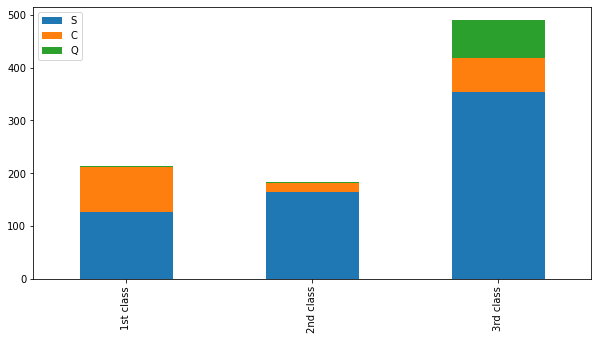

In [27]:
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

* As the diagram shows S is the highst embarked location. So we will fill the missing values with S.

In [28]:
for dataset in trainAndTest:
    dataset["Embarked"].fillna("S", inplace=True)

### 4.4.2 Embarked Mapping
Map the embarked values to numbers.
<b>embarked Mapping</b>
1. S => 0
2. C => 1
3. Q => 2

In [29]:
embarkedMapping ={"S": 0, "C": 1, "Q": 2}
for dataset in trainAndTest:
    dataset["Embarked"] = dataset["Embarked"].map(embarkedMapping)

## 4.4 Fare
### 4.4.1 Filling Missing Values
Some fare values are missing as we see before in section 3.2. The median fare for each class will be used to fill the missing values. 

In [30]:
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)

### 4.4.2 Categorizing Fare
To make the values more simple we categorize the Fare into four groups:
1. 0<fare<=17     =>0
2. 17<fare<=30    =>1
3. 30<fare<=100   =>2
4. 100<fare       =>3

In [31]:
for dataset in trainAndTest:
    dataset.loc[ dataset['Fare'] <= 17, 'Fare'] = 0,
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1,
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2,
    dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 3

## 4.5 Cabin
### 4.5.1 Cabin Mapping
We will first map the cabin values to some number to make filling the null values easier.

In [32]:
train["Cabin"].value_counts()

G6             4
C23 C25 C27    4
B96 B98        4
C22 C26        3
F33            3
              ..
E34            1
E38            1
A20            1
C46            1
B69            1
Name: Cabin, Length: 147, dtype: int64

* As we can see the first character in cabin name is a capital letter so to make it more simple we will take only the first letter.

In [33]:
for dataset in trainAndTest:
    dataset["Cabin"] = dataset["Cabin"].str[:1]

In [34]:
train["Cabin"].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

<b>Cabin Mapping</b>
1. A = 0
2. B = 0.4
3. C = 0.8
4. D = 1.2
5. E = 1.6
6. F = 2
7. G = 2.4
8. T = 2.8

In [35]:
cabinMapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
for dataset in trainAndTest:
    dataset['Cabin'] = dataset['Cabin'].map(cabinMapping)

### 4.5.2 Filling Missing Values
In the previous step we change the cabin names to numbers. So we can take the median value of the cabin based on the class and fill the missing values.

In [36]:
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

## 4.6 Family Size (new feature)
We can find the family size by adding the number of SibSp + Parch + 1(the person). This information can be added in a new feature

In [37]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

### 4.6.1 Family Size Mapping
1. 1=0
2. 2=0.4
3. 3=0.8
4. 4=1.2
5. 5=1.6
6. 6=2
7. 7=2.4
8. 8=2.8
9. 9=3.2
10. 10=3.6
11. 11=4

In [38]:
familyMapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in trainAndTest:
    dataset['FamilySize'] = dataset['FamilySize'].map(familyMapping)

## 4.7 Dropping Unnecessary Features

In [39]:
features_drop = ['Ticket', 'SibSp', 'Parch']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
train = train.drop(['PassengerId'], axis=1)

In [40]:
train_data = train.drop('Survived', axis=1)
target = train['Survived']

# 5. Modelling

In [41]:
# Importing Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

## 5.1  Cross Validation (K-fold)

In [42]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

### 5.1.1 kNN

In [43]:
clf = KNeighborsClassifier(13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.82222222 0.76404494 0.80898876 0.83146067 0.87640449 0.82022472
 0.85393258 0.79775281 0.84269663 0.84269663]


In [44]:
# kNN Score
round(np.mean(score)*100, 2)

82.6

### 5.1.2 Decision Tree

In [45]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.76666667 0.80898876 0.75280899 0.76404494 0.8988764  0.7752809
 0.84269663 0.82022472 0.74157303 0.78651685]


In [46]:
# decision tree Score
round(np.mean(score)*100, 2)

79.58

### 5.1.3 Ramdom Forest

In [47]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.77777778 0.82022472 0.80898876 0.78651685 0.86516854 0.78651685
 0.80898876 0.83146067 0.76404494 0.82022472]


In [48]:
# Random Forest Score
round(np.mean(score)*100, 2)

80.7

### 5.1.4 Naive Bayes

In [49]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.85555556 0.73033708 0.75280899 0.75280899 0.70786517 0.80898876
 0.76404494 0.80898876 0.86516854 0.83146067]


In [50]:
# Naive Bayes Score
round(np.mean(score)*100, 2)

78.78

### 5.1.5 SVM

In [51]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.83333333 0.79775281 0.83146067 0.82022472 0.84269663 0.82022472
 0.84269663 0.85393258 0.84269663 0.86516854]


In [52]:
round(np.mean(score)*100,2)

83.5

# 6. Testing
we use SVC as the classifier because it scored the highest accuracy.

In [53]:
clf = SVC()
clf.fit(train_data, target)

test_data = test.drop("PassengerId", axis=1).copy()
prediction = clf.predict(test_data)

In [54]:
solution = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": prediction
    })

solution.to_csv('solution.csv', index=False)

In [55]:
solution = pd.read_csv('solution.csv')
solution.head(100)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
95,987,0
96,988,1
97,989,0
98,990,1


# 5. References
    Press, G. (2016, March 23). Cleaning Big Data: Most Time-Consuming, Least Enjoyable Data Science Task, Survey Says. Retrieved June 15, 2020, from https://www.forbes.com/sites/gilpress/2016/03/23/data-preparation-most-time-consuming-least-enjoyable-data-science-task-survey-says/
     
* <b>GitHub Repos</b>
    1. https://github.com/minsuk-heo/kaggle-titanic
* <b>Youtube Videos</b>
    1. series(https://youtu.be/3eTSVGY_fIE)
    2. series(https://youtu.be/cKxRvEZd3Mw)
    3. https://youtu.be/ABV2YS9jbzE
* <b>Documntations</b>
    1. seaborn(https://seaborn.pydata.org/)
    2. pandas(https://pandas.pydata.org/pandas-docs/version/0.25.3/)